<a href="https://colab.research.google.com/github/mbayekebe/Coursera_Capstone/blob/master/AnalysisPCA_kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Analysis looking for similarities and differences using Principal Component Analysis followed by kMeans Clustering

In [0]:
import numpy as np
import pandas as pd
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
 
from sklearn.decomposition import PCA
from sklearn import datasets

In [0]:
# Pandas Options (optional)
pd_maxrows = 10
pd.set_option("display.max_rows",pd_maxrows)
 
pd.set_option("display.max_columns",30)

In [0]:
matX = pd.read_csv('NewYorkToronto7VenueCat408Neighb.csv')



In [0]:
df = pd.DataFrame(matX)
df.head()

,City,Arts,CollegeUniversity,Food,Professional,Nightlife,Outdoor,ShopServices,TravelTransport,Residence
0,toronto,0,1,1,9,0,3,4,4,4
1,toronto,1,1,5,19,0,5,15,4,7
2,toronto,50,8,50,49,27,47,50,38,35
3,toronto,4,3,12,28,2,6,39,1,0
4,toronto,45,48,50,50,41,45,50,28,49


In [0]:
labels = df['City'].unique().tolist()

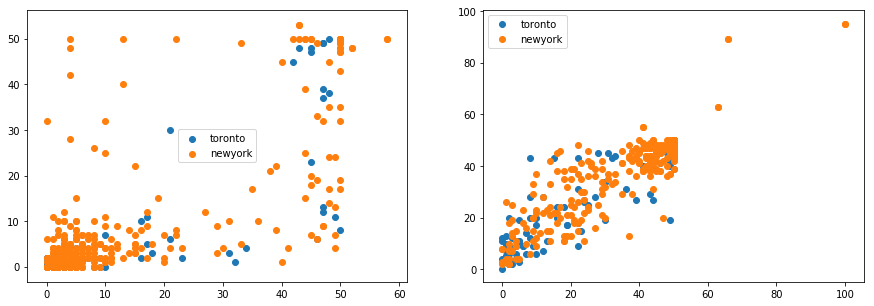

In [0]:
plt.figure(figsize=(15,5))
plt.subplot(121)
for lab in labels:
    plt.scatter(df.loc[df['City'] == lab, 'Arts'],  df.loc[df['City'] == lab, 'CollegeUniversity'], label=lab)
    plt.legend()
    
plt.subplot(122)
for lab in labels:
    plt.scatter(df.loc[df['City'] == lab, 'Food'],  df.loc[df['City'] == lab, 'Professional'], label=lab)
    plt.legend()
   

In [0]:
X = df.iloc[:,1:10]
X.head()

,Arts,CollegeUniversity,Food,Professional,Nightlife,Outdoor,ShopServices,TravelTransport,Residence
0,0,1,1,9,0,3,4,4,4
1,1,1,5,19,0,5,15,4,7
2,50,8,50,49,27,47,50,38,35
3,4,3,12,28,2,6,39,1,0
4,45,48,50,50,41,45,50,28,49


In [0]:
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

In [0]:
dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['City'] = df['City']
dfPCA
dfPCA.to_csv('dfPCA.csv')

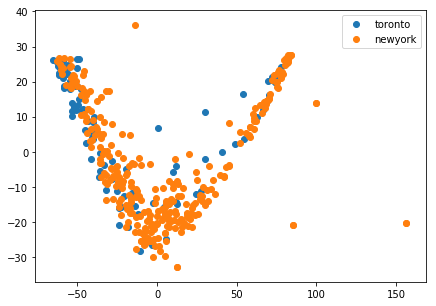

In [0]:
plt.figure(figsize=(7,5))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['City'] == lab, 'x1'],  dfPCA.loc[dfPCA['City'] == lab, 'x2'], label=lab)
    plt.legend()

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
%matplotlib inline

In [0]:
import numpy as np

dfc = pd.read_csv('dfPCAc.csv', index_col=0)
dfc.head()

,Component1,Component2,City
0,-56.768363,22.241160,toronto
1,-46.409590,12.190107,toronto
2,54.383001,3.760187,toronto
3,-34.166746,-6.276298,toronto
4,69.627806,20.069983,toronto


In [0]:
X = dfc.iloc[:,0:2]
X.head()

,Component1,Component2
0,-56.768363,22.241160
1,-46.409590,12.190107
2,54.383001,3.760187
3,-34.166746,-6.276298
4,69.627806,20.069983


In [0]:
labels = dfc['City'].unique().tolist()
labels


['toronto', 'newyork']

In [0]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
# This is what KMeans thought
model.labels_

array([2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1,
       1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2,

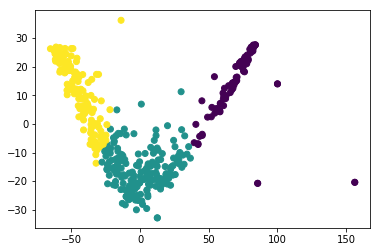

In [0]:
import pylab as pl
pl.figure('K-means with 3 clusters')
pl.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_)
pl.show()

In [0]:
cluster_map = pd.DataFrame()
cluster_map['X_index'] = X.index.values
cluster_map['cluster'] = model.labels_

In [0]:
cluster_map[cluster_map.cluster == 0]

,X_index,cluster
2,2,0
4,4,0
9,9,0
15,15,0
20,20,0
...,...,...
378,378,0
379,379,0
381,381,0
385,385,0


In [0]:
df_merged = df
df_merged['Cluster Labels'] = model.labels_
df_merged.head(10)
df_merged.to_csv("df_merged.csv")

In [0]:
Cluster0 = df_merged[df_merged['Cluster Labels'] == 0]
Cluster1 = df_merged[df_merged['Cluster Labels'] == 1]
Cluster2 = df_merged[df_merged['Cluster Labels'] == 2]

In [0]:
Cluster0.to_csv('Cluster0.csv')
Cluster1.to_csv('Cluster1.csv')
Cluster2.to_csv('Cluster2.csv')

In [0]:
dfcr = pd.read_csv('dfc_merged.csv')

In [0]:
dfcr.head()

,Borough,Neighborhood,City,Arts,CollegeUniversity,Food,Professional,Nightlife,Outdoor,ShopServices,TravelTransport,Residence,Cluster Labels
0,North York,Parkwoods,toronto,0,1,1,9,0,3,4,4,4,2
1,North York,Victoria Village,toronto,1,1,5,19,0,5,15,4,7,2
2,Downtown Toronto,"Harbourfront,Regent Park",toronto,50,8,50,49,27,47,50,38,35,0
3,North York,"Lawrence Heights,Lawrence Manor",toronto,4,3,12,28,2,6,39,1,0,2
4,Queen's Park,Queen's Park,toronto,45,48,50,50,41,45,50,28,49,0


In [0]:
dfcr.drop(dfcr.columns[[0,1,2]], axis=1, inplace=True)

In [0]:
dfcr.head()

,Arts,CollegeUniversity,Food,Professional,Nightlife,Outdoor,ShopServices,TravelTransport,Residence,Cluster Labels
0,0,1,1,9,0,3,4,4,4,2
1,1,1,5,19,0,5,15,4,7,2
2,50,8,50,49,27,47,50,38,35,0
3,4,3,12,28,2,6,39,1,0,2
4,45,48,50,50,41,45,50,28,49,0
